The point of this file is to create a graphic that verifies that the data from cleaning the data for our new models is correct. See data_clean/cleans_minimal.py

In [138]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import math

In [139]:
datalog_DIR = '../../data/'

## Import data

In [140]:
#Import cleaned data
datalogFile = datalog_DIR + 'results.csv'
df = pd.read_csv(datalogFile, sep=',')
df.head()

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),in_angle1,in_angle2,in_angle3,in_angle4,in_angle5,out_angle1,out_angle2,out_angle3,out_angle4,out_angle5
0,0,0.001,0,0.0,0.0,0.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.002,0,0.0,0.0,0.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.003,0,0.0,0.0,0.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.004,0,0.0,0.0,0.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.005,0,0.0,0.0,0.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
#Import enclosure data
datalogFile = datalog_DIR + 'boundaryDescription.txt'
boundary_df = pd.read_csv(datalogFile, sep=',')
boundary_df.head()

,name,X,Y,Z,Roll,Pitch,Yaw,sizeX,sizeY,sizeZ
0,rail01,0.56355,0.00000,0.03175,0,0,0.00000,0.01905,1.12713,0.0889
1,rail02,0.00000,0.56356,0.03175,0,0,1.57000,0.01905,1.15250,0.0889
2,rail03,-0.56355,0.00000,0.03175,0,0,3.14000,0.01905,1.12713,0.0889
3,rail04,0.00000,-0.56356,0.03175,0,0,-1.57319,0.01905,1.15250,0.0889


## Find a few in row examples

In [142]:
NUMBER_OF_EXAMPLES = 2

In [143]:
indexes = []
for i in df.index:
    if df.at[i, 'NumberOfWalls'] > 0 and df.at[i-1, 'NumberOfWalls'] == 0 and len(indexes) < NUMBER_OF_EXAMPLES:
        indexes.append(i)
indexes

[1880, 1927]

In [144]:
POINTS_TO_TRACK = 10 #How many points after and before the point we are looking at to draw in the figure

In [145]:
rows = []
for i in range(NUMBER_OF_EXAMPLES):
    rows.append(range(indexes[i]-POINTS_TO_TRACK,indexes[i]+POINTS_TO_TRACK))
rows

[range(1870, 1890), range(1917, 1937)]

In [146]:
df_in_angle = df.iloc[np.r_[rows].flatten()]
df_in_angle.head()

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),in_angle1,in_angle2,in_angle3,in_angle4,in_angle5,out_angle1,out_angle2,out_angle3,out_angle4,out_angle5
1870,1870,1.871,0,0.271541,0.488980,0.019666,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,1871,1.872,0,0.271766,0.489481,0.019702,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,1872,1.873,0,0.271989,0.489981,0.019740,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,1873,1.874,0,0.272209,0.490477,0.019773,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,1874,1.875,0,0.272440,0.490987,0.019795,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#Add a label to each row for the corresponding ranges
for i in range(NUMBER_OF_EXAMPLES):
    local_range = rows[i]
    df_in_angle.loc[local_range, 'id'] = int(i)
df_in_angle

,Unnamed: 0,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s),...,in_angle2,in_angle3,in_angle4,in_angle5,out_angle1,out_angle2,out_angle3,out_angle4,out_angle5,id
1870,1870,1.871,0,0.271541,0.488980,0.019666,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1871,1871,1.872,0,0.271766,0.489481,0.019702,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1872,1872,1.873,0,0.271989,0.489981,0.019740,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1873,1873,1.874,0,0.272209,0.490477,0.019773,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1874,1874,1.875,0,0.272440,0.490987,0.019795,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1875,1875,1.876,0,0.272667,0.491494,0.019813,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1876,1876,1.877,0,0.272893,0.491998,0.019834,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1877,1877,1.878,0,0.273117,0.492502,0.019857,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1878,1878,1.879,0,0.273339,0.493003,0.019883,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1879,1879,1.880,0,0.273383,0.492988,0.020176,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Create figure for inrow

In [148]:
boundary_df.head()

,name,X,Y,Z,Roll,Pitch,Yaw,sizeX,sizeY,sizeZ
0,rail01,0.56355,0.00000,0.03175,0,0,0.00000,0.01905,1.12713,0.0889
1,rail02,0.00000,0.56356,0.03175,0,0,1.57000,0.01905,1.15250,0.0889
2,rail03,-0.56355,0.00000,0.03175,0,0,3.14000,0.01905,1.12713,0.0889
3,rail04,0.00000,-0.56356,0.03175,0,0,-1.57319,0.01905,1.15250,0.0889


In [149]:
#Get rectangles representing environment.
#For each of them, need a lower left starting point, width, height, and angle
rectangles = []

for i in boundary_df.index:
    x_l = boundary_df.at[i,'X'] - (boundary_df.at[i,'sizeX']/2) * math.cos(boundary_df.at[i,'Yaw']) - (boundary_df.at[i,'sizeY']/2) * math.sin(boundary_df.at[i,'Yaw']) 
    y_l = boundary_df.at[i,'Y'] - (boundary_df.at[i,'sizeY']/2) * math.cos(boundary_df.at[i,'Yaw']) - (boundary_df.at[i,'sizeX']/2) * math.sin(boundary_df.at[i,'Yaw']) 
    width = boundary_df.at[i,'sizeX']
    height = boundary_df.at[i,'sizeY']
    angle = np.rad2deg(boundary_df.at[i,'Yaw']) + 90
    print(x_l,y_l,width,height,angle)
    rect = Rectangle((x_l,y_l),width,height,angle=angle,color='Black')
    rectangles.append(rect)

0.554025 -0.563565 0.01905 1.12713 90.0
-0.5762574023013896 0.5535761197530144 0.01905 1.1525 179.95437383553923
-0.5549225755211751 0.5635491152270012 0.01905 1.12713 269.90874767107846
0.5762711488547185 -0.5526556744203137 0.01905 1.1525 -0.1371473721859786


In [150]:
x,y = df_in_angle.loc[rows[0],'X'], df_in_angle.loc[rows[0],'Y']
x,y = x.tolist(), y.tolist()
print(x,y)

[0.271541, 0.271766, 0.271989, 0.27220900000000003, 0.27244, 0.272667, 0.272893, 0.273117, 0.273339, 0.273383, 0.273929, 0.274012, 0.274881, 0.27497, 0.275681, 0.275729, 0.276217, 0.276335, 0.27665, 0.276706] [0.48898, 0.4894810000000001, 0.4899810000000001, 0.4904770000000001, 0.490987, 0.491494, 0.491998, 0.4925020000000001, 0.493003, 0.492988, 0.493964, 0.492918, 0.494295, 0.492872, 0.494335, 0.4929520000000001, 0.494057, 0.492865, 0.493856, 0.492914]


In [158]:
index = indexes[0]
print(index)
xl = [df.at[index,'X']]
yl = [df.at[index,'Y']]
angle = df.at[index,'in_angle2']
print(angle)
print(math.tan(angle))
xl.append(xl[0] + 1.0)
yl.append(yl[0] + math.tan(angle))

1880
1.78
-4.710091916114258


In [159]:
df.iloc[1880]

Unnamed: 0               1880
Time                    1.881
ID                          0
X                    0.273929
Y                    0.493964
Yaw                 0.0203294
ResetID                     1
checkCorrectness            1
NumberOfWalls               1
WallId(s)                   2
in_angle1             2.08005
in_angle2             2.10277
in_angle3             2.08424
in_angle4             2.05969
in_angle5             2.04145
out_angle1                NaN
out_angle2                NaN
out_angle3                NaN
out_angle4                NaN
out_angle5                NaN
Name: 1880, dtype: object

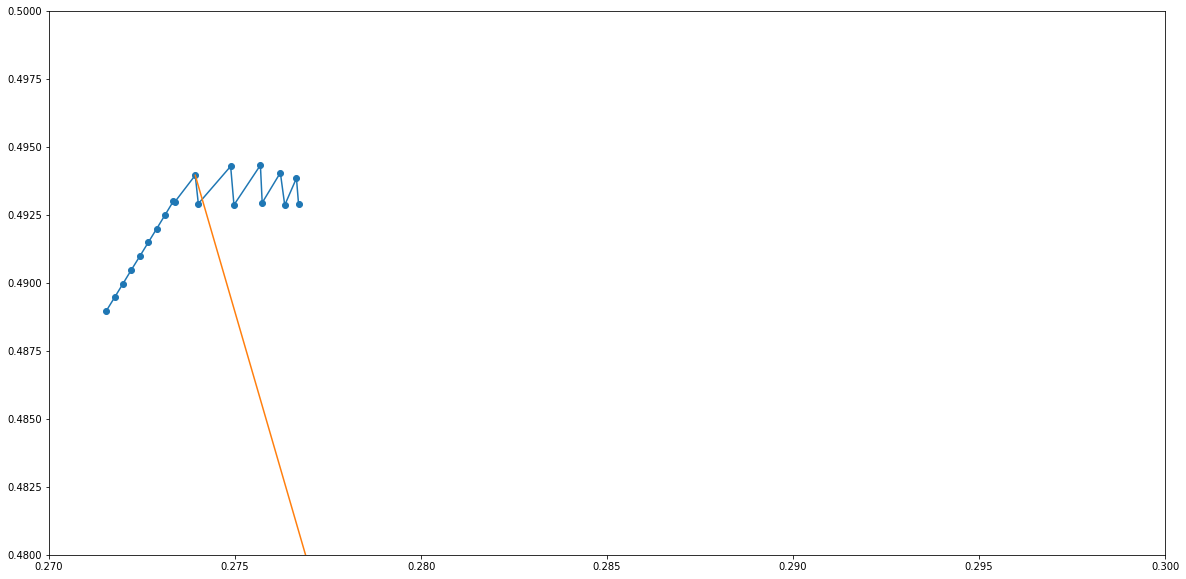

In [160]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y)
plt.plot(xl,yl)
plt.xlim([0.27,0.30])
plt.ylim([.48,.5])
plt.show()

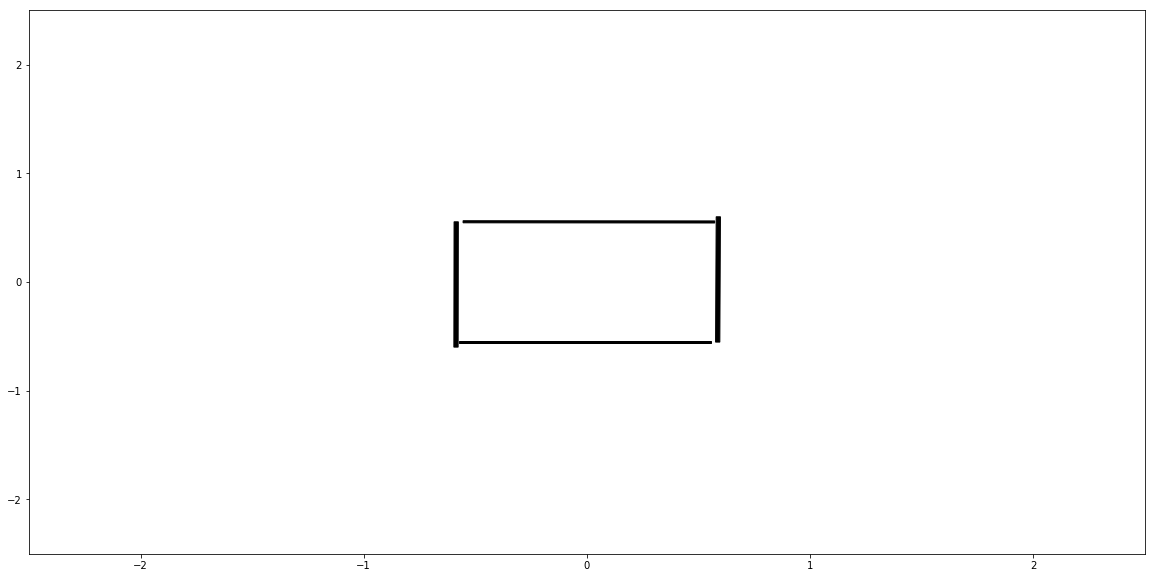

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
for rect in rectangles:
    ax.add_patch(rect)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.show()